In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay,classification_report


In [2]:
df=pd.read_csv(r"/content/drive/MyDrive/COVIDSenti-A.csv")

In [3]:
df

,tweet,label
0,Coronavirus | Human Coronavirus Types | CDC ht...,neu
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",neu
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",neg
3,Disease outbreak news from the WHO: Middle Eas...,neu
4,China - Media: WSJ says sources tell them myst...,neu
...,...,...
29995,CDC: Re-test confirms Westerdam cruise ship pa...,neu
29996,Two doctors die of coronavirus within 24 hours...,neu
29997,BEIJING - The lockdown of Guo Jing's neighbour...,neu
29998,#CoronavirusOutbreak in #Balochistan !!\n#CPEC...,neu


## Pre-Processing


In [4]:
df.head()

,tweet,label
0,Coronavirus | Human Coronavirus Types | CDC ht...,neu
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",neu
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",neg
3,Disease outbreak news from the WHO: Middle Eas...,neu
4,China - Media: WSJ says sources tell them myst...,neu


In [5]:
df.describe()

,tweet,label
count,30000,30000
unique,29987,3
top,Copper price and coronavirus: ‚ÄúBlack swan li...,neu
freq,3,22949


In [6]:
df.isnull().sum()

tweet    0
label    0
dtype: int64

In [7]:
df['label'].value_counts()

neu    22949
neg     5083
pos     1968
Name: label, dtype: int64

In [8]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
def clean_tweet(tweet):
  if type(tweet) == float:
    return ""
  temp = tweet.lower() # Making all the words in lower case
  temp = re.sub("'","",temp) #To avoid removing contractions in English
  temp = re.sub("@[A-Za-z0-9_]+","", temp) #Removing mentions     
  temp = re.sub("#[A-Za-z0-9_]+","", temp) #Removing hashtags
  temp = re.sub(r'http\S+', '', temp) #Removing links
  temp = re.sub('\[().*!?\]', ' ', temp) # Removing punctuations
  temp = re.sub("[^a-z0-9]", " ", temp)
  temp = temp.split() # Splitting the sentence into individual words
  temp = [w for w in temp if not w in stop_words]
  temp = " ".join(word for word in temp)
  return temp

In [10]:
df['tweet'] = df['tweet'].apply(clean_tweet)

In [11]:
df

,tweet,label
0,coronavirus human coronavirus types cdc,neu
1,true corona virus swine flue bird flu december...,neu
2,tldr sars possibly new coronavirus difficult c...,neg
3,disease outbreak news middle east respiratory ...,neu
4,china media wsj says sources tell mystery pneu...,neu
...,...,...
29995,cdc test confirms westerdam cruise ship passen...,neu
29996,two doctors die coronavirus within 24 hours ch...,neu
29997,beijing lockdown guo jings neighbourhood wuhan...,neu
29998,route spread,neu


In [12]:
x=df["tweet"]
y=df["label"]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.3, random_state = 0)

In [14]:
x_train.shape

(21000,)

In [15]:
x_test.shape

(9000,)

TF-IDF Vectorizer

In [16]:
#Text encoding using TF-IDF for using in SVM
tf_idf = TfidfVectorizer(max_features = 5000)
tf_idf.fit(df['tweet'])
x_train_tfidf = tf_idf.transform(x_train)
x_test_tfidf = tf_idf.transform(x_test)

In [17]:
print(x_train_tfidf)

  (0, 1848)	0.9741962073988126
  (0, 1119)	0.22570279016833045
  (1, 4916)	0.2186722663748053
  (1, 4528)	0.3587960132292838
  (1, 3415)	0.3853155646128059
  (1, 3159)	0.3403397239020769
  (1, 1924)	0.3747410472339973
  (1, 1119)	0.06499532581140907
  (1, 920)	0.13777969057256426
  (1, 914)	0.43737754297011566
  (1, 893)	0.3815224323517312
  (1, 361)	0.24218108789675988
  (2, 4496)	0.3564163172958567
  (2, 3500)	0.5684473733279514
  (2, 2729)	0.4272672237639855
  (2, 1880)	0.2906852591615487
  (2, 1693)	0.49583861483020264
  (2, 920)	0.19215582262392528
  (3, 4758)	0.1748556286943295
  (3, 4294)	0.42968255378843717
  (3, 4184)	0.5221868441706797
  (3, 2855)	0.33299637493476975
  (3, 2505)	0.3876347738394451
  (3, 2412)	0.36455233801702724
  (3, 347)	0.34361839458312987
  :	:
  (20996, 2855)	0.3015921907063131
  (20996, 2676)	0.2423804765418387
  (20996, 2527)	0.35845596630633914
  (20996, 2402)	0.2992335484871525
  (20996, 1699)	0.35463499597787185
  (20996, 1116)	0.16816011158084074
 

## Support Vector Machine


In [18]:
#linear kernel
clf=svm.SVC(kernel='linear')
clf.fit(x_train_tfidf,y_train)

SVC(kernel='linear')

In [19]:
#making predictions
y_pred = clf.predict(x_test_tfidf)
test_prediction = pd.DataFrame()
test_prediction['tweet'] = x_test
test_prediction['label'] = y_pred
test_prediction

,tweet,label
8225,duterte like welcome chinese especially corona...,neu
10794,information stating infected novel coronavirus...,neu
9163,coronavirus update pandemic via,neu
26591,3000 healthcare personnel china infected coron...,neu
6631,brent recoups china virus angst fed speak play...,neu
...,...,...
21914,united panic bought striker telling come train...,neu
17453,,neu
20344,nzd usd technical bias bearish dow jones brush...,neu
1878,sounds like something catch drinking beers spr...,neu


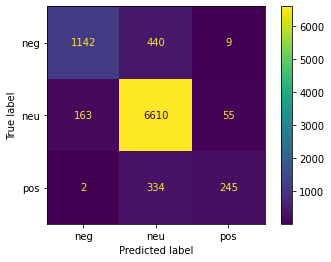

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [21]:
pred_linear=clf.predict(x_test_tfidf)
from sklearn import metrics
metrics.accuracy_score(y_test,pred_linear)

0.8885555555555555

In [22]:
#Accuracy
accuracy = accuracy_score(y_pred, y_test)*100
accuracy

88.85555555555555

In [23]:

print(classification_report(y_test, pred_linear))

              precision    recall  f1-score   support

         neg       0.87      0.72      0.79      1591
         neu       0.90      0.97      0.93      6828
         pos       0.79      0.42      0.55       581

    accuracy                           0.89      9000
   macro avg       0.85      0.70      0.76      9000
weighted avg       0.88      0.89      0.88      9000



Accuracy =88.55